


#### The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Cargar los datos
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [4]:
# Nombres de las clases para referencia
class_names = ['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botín']

In [5]:
# Seleccionar una imagen aleatoria del conjunto de entrenamiento
index = np.random.randint(0, len(x_train))
image = x_train[index]
label = y_train[index]

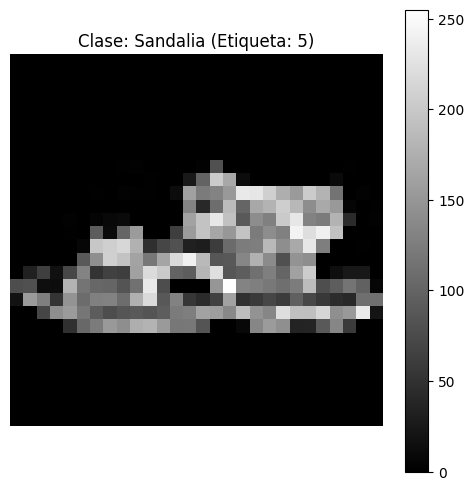

In [6]:
# Mostrar la imagen
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title(f"Clase: {class_names[label]} (Etiqueta: {label})")
plt.colorbar()
plt.axis('off')
plt.show()

In [7]:
# Mostrar información adicional
print(f"Forma de la imagen: {image.shape}")
print(f"Valores de píxel entre {image.min()} y {image.max()}")

Forma de la imagen: (28, 28)
Valores de píxel entre 0 y 255


## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [8]:
# Normalizar los datos dividiendo por el valor máximo (255)
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [10]:
# Verificar los resultados
print("--- Antes de normalizar ---")
print(f"Valor mínimo en x_train: {x_train.min()}")
print(f"Valor máximo en x_train: {x_train.max()}")
print(f"Tipo de datos en x_train: {x_train.dtype}")
print("\n--- Después de normalizar ---")
print(f"Valor mínimo en x_train_normalized: {x_train_normalized.min()}")
print(f"Valor máximo en x_train_normalized: {x_train_normalized.max()}")
print(f"Tipo de datos en x_train_normalized: {x_train_normalized.dtype}")


--- Antes de normalizar ---
Valor mínimo en x_train: 0
Valor máximo en x_train: 255
Tipo de datos en x_train: uint8

--- Después de normalizar ---
Valor mínimo en x_train_normalized: 0.0
Valor máximo en x_train_normalized: 1.0
Tipo de datos en x_train_normalized: float32


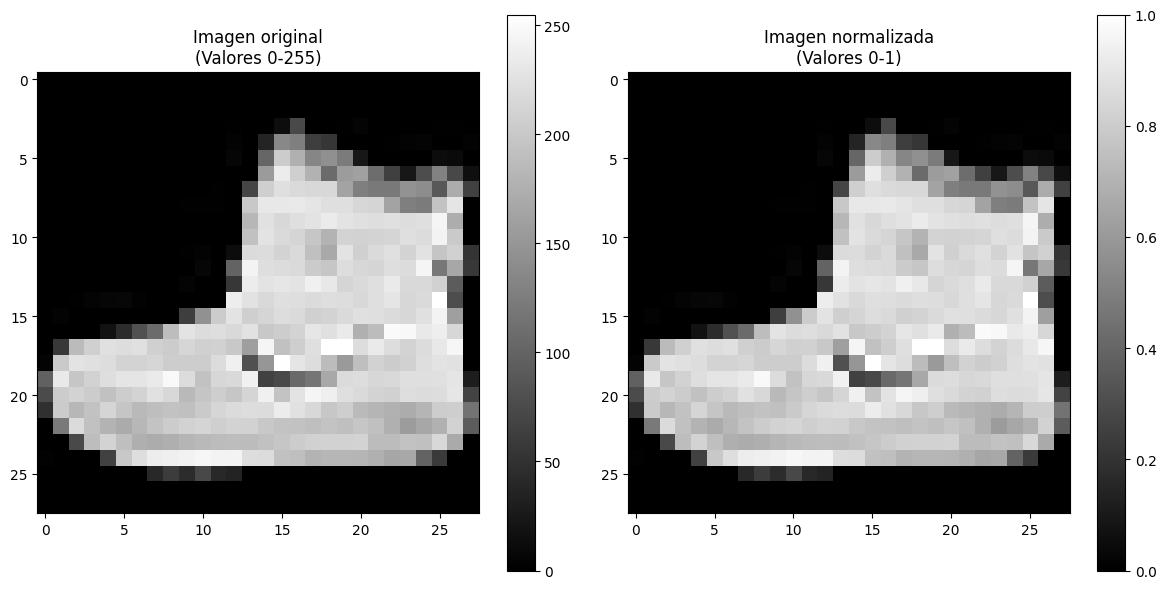

In [11]:
# Visualizar una imagen normalizada para comparación
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_train[0], cmap='gray')
plt.title('Imagen original\n(Valores 0-255)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(x_train_normalized[0], cmap='gray')
plt.title('Imagen normalizada\n(Valores 0-1)')
plt.colorbar()

plt.tight_layout()
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# 1. Crear modelo secuencial
model = Sequential([
    # Capa para aplanar las imágenes de 28x28 a un vector de 784 elementos
    Flatten(input_shape=(28, 28)),

    # Capa densa (fully connected) con 128 neuronas y activación ReLU
    Dense(128, activation='relu'),

    # Capa de salida con 10 neuronas (una por clase) y activación softmax
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# 2. Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# 3. Entrenar el modelo (usando los datos normalizados del paso anterior)
history = model.fit(x_train_normalized, y_train,
                    epochs=10,
                    validation_data=(x_test_normalized, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7770 - loss: 0.6347 - val_accuracy: 0.8370 - val_loss: 0.4520
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8637 - loss: 0.3770 - val_accuracy: 0.8601 - val_loss: 0.3837
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8778 - loss: 0.3367 - val_accuracy: 0.8727 - val_loss: 0.3562
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8851 - loss: 0.3135 - val_accuracy: 0.8655 - val_loss: 0.3764
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8903 - loss: 0.2976 - val_accuracy: 0.8776 - val_loss: 0.3426
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8964 - loss: 0.2802 - val_accuracy: 0.8729 - val_loss: 0.3440
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9023 - loss: 0.2664 - val_accuracy: 0.8709 - val_loss: 0.3550
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9060 - loss: 0.252

In [15]:
# 4. Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test_normalized, y_test, verbose=2)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

313/313 - 1s - 2ms/step - accuracy: 0.8844 - loss: 0.3353

Precisión en el conjunto de prueba: 0.8844


In [16]:
# 5. Visualizar el rendimiento del entrenamiento
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

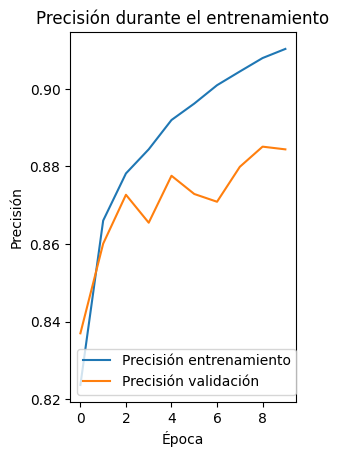

In [17]:
# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

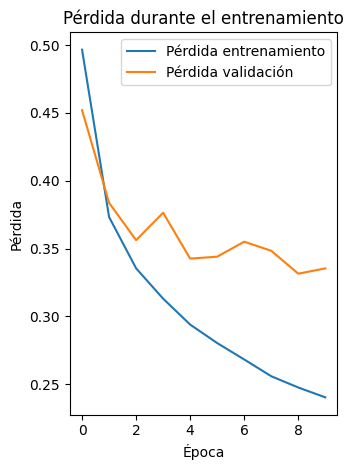

In [18]:
# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [19]:
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas a one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

In [20]:
# Verificar la conversión
print("--- Antes de one-hot encoding ---")
print(f"Forma de y_train: {y_train.shape}")
print(f"Valores de ejemplo: {y_train[:5]}")

print("\n--- Después de one-hot encoding ---")
print(f"Forma de y_train_onehot: {y_train_onehot.shape}")
print(f"Valores de ejemplo:\n{y_train_onehot[:5]}")


--- Antes de one-hot encoding ---
Forma de y_train: (60000,)
Valores de ejemplo: [9 0 0 3 0]

--- Después de one-hot encoding ---
Forma de y_train_onehot: (60000, 10)
Valores de ejemplo:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
# Mostrar la correspondencia entre etiquetas y one-hot encoding
for i in range(5):
    print(f"\nEtiqueta original: {y_train[i]}")
    print(f"One-hot encoded: {y_train_onehot[i]}")
    print(f"Clase correspondiente: {class_names[y_train[i]]}")


Etiqueta original: 9
One-hot encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Clase correspondiente: Botín

Etiqueta original: 0
One-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Clase correspondiente: Camiseta/top

Etiqueta original: 0
One-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Clase correspondiente: Camiseta/top

Etiqueta original: 3
One-hot encoded: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Clase correspondiente: Vestido

Etiqueta original: 0
One-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Clase correspondiente: Camiseta/top


## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [22]:
# 1. Obtener las predicciones del modelo
y_pred = model.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir probabilidades a clases

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class_names = ['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botín']

In [25]:
# 1. Obtener las predicciones del modelo
y_pred = model.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir probabilidades a clases


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
# 2. Mostrar reporte de clasificación completo
print("\n" + "="*60)
print("Informe de clasificación detallado")
print("="*60)
print(classification_report(y_test, y_pred_classes, target_names=class_names))


Informe de clasificación detallado
                     precision    recall  f1-score   support

       Camiseta/top       0.81      0.87      0.84      1000
           Pantalón       0.99      0.97      0.98      1000
             Jersey       0.83      0.75      0.79      1000
            Vestido       0.86      0.91      0.88      1000
             Abrigo       0.78      0.82      0.80      1000
           Sandalia       0.97      0.96      0.97      1000
             Camisa       0.72      0.67      0.69      1000
Zapatilla deportiva       0.94      0.96      0.95      1000
              Bolso       0.98      0.97      0.97      1000
              Botín       0.96      0.95      0.96      1000

           accuracy                           0.88     10000
          macro avg       0.88      0.88      0.88     10000
       weighted avg       0.88      0.88      0.88     10000



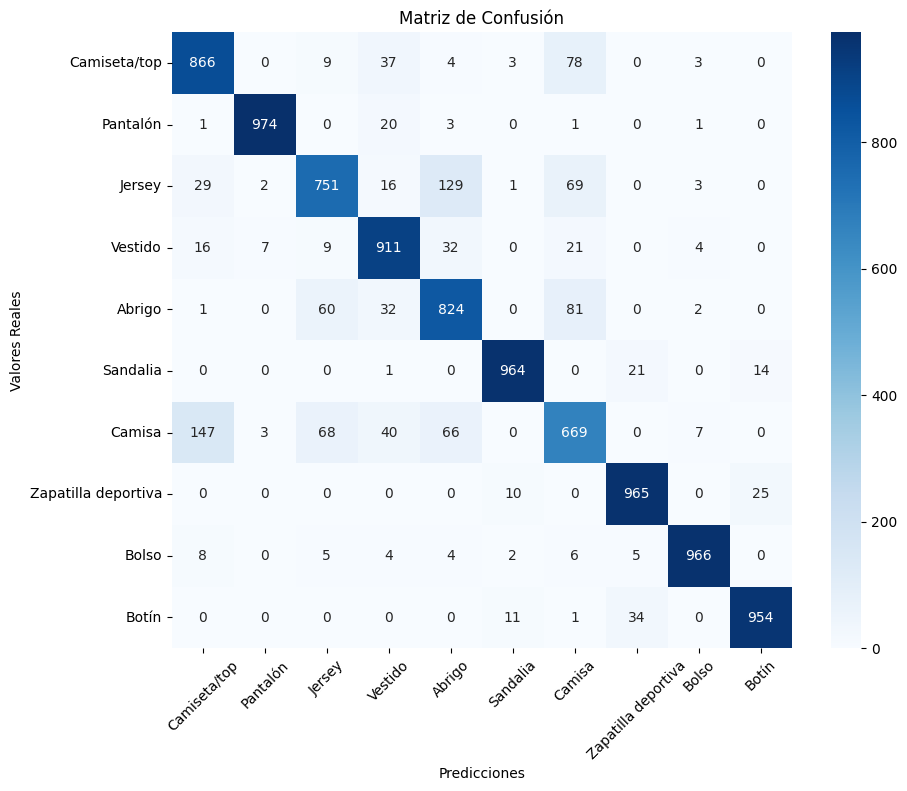

In [27]:
# 3. Matriz de confusión visual
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [28]:
# 4. Métricas adicionales por clase
precision = cm.diagonal() / cm.sum(axis=0)
recall = cm.diagonal() / cm.sum(axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

metrics_df = pd.DataFrame({
    'Clase': class_names,
    'Precisión': precision,
    'Recall': recall,
    'F1-Score': f1_score
}).set_index('Clase')

print("\n" + "="*60)
print("Métricas por clase")
print("="*60)
print(metrics_df)


Métricas por clase
                     Precisión  Recall  F1-Score
Clase                                           
Camiseta/top          0.810861   0.866  0.837524
Pantalón              0.987830   0.974  0.980866
Jersey                0.832594   0.751  0.789695
Vestido               0.858624   0.911  0.884037
Abrigo                0.775895   0.824  0.799224
Sandalia              0.972755   0.964  0.968358
Camisa                0.722462   0.669  0.694704
Zapatilla deportiva   0.941463   0.965  0.953086
Bolso                 0.979716   0.966  0.972810
Botín                 0.960725   0.954  0.957351


             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000

